In [29]:
# This project will display different visualizations to assist with EDA
#
#
# importing the libraries
import pandas as pd
import numpy as np
import missingno as msno

In [30]:
# read in csv
df = pd.read_csv('data/alldogdescriptions.csv')

In [31]:
#view the first few rows to see the available dataset
df.head()

,index,id,org_id,url,type.x,species,breed_primary,breed_secondary,breed_mixed,breed_unknown,...,status,posted,contact_city,contact_state,contact_zip,contact_country,stateQ,accessed,type.y,description
0,0,46042150,NV163,https://www.petfinder.com/dog/harley-46042150/...,Dog,Dog,American Staffordshire Terrier,Mixed Breed,True,False,...,adoptable,2019-09-20T16:37:59+0000,Las Vegas,NV,89147,US,89009,2019-09-20,Dog,Harley is not sure how he wound up at shelter ...
1,1,46042002,NV163,https://www.petfinder.com/dog/biggie-46042002/...,Dog,Dog,Pit Bull Terrier,Mixed Breed,True,False,...,adoptable,2019-09-20T16:24:57+0000,Las Vegas,NV,89147,US,89009,2019-09-20,Dog,6 year old Biggie has lost his home and really...
2,2,46040898,NV99,https://www.petfinder.com/dog/ziggy-46040898/n...,Dog,Dog,Shepherd,NaN,False,False,...,adoptable,2019-09-20T14:10:11+0000,Mesquite,NV,89027,US,89009,2019-09-20,Dog,Approx 2 years old.\n Did I catch your eye? I ...
3,3,46039877,NV202,https://www.petfinder.com/dog/gypsy-46039877/n...,Dog,Dog,German Shepherd Dog,NaN,False,False,...,adoptable,2019-09-20T10:08:22+0000,Pahrump,NV,89048,US,89009,2019-09-20,Dog,NaN
4,4,46039306,NV184,https://www.petfinder.com/dog/theo-46039306/nv...,Dog,Dog,Dachshund,NaN,False,False,...,adoptable,2019-09-20T06:48:30+0000,Henderson,NV,89052,US,89009,2019-09-20,Dog,Theo is a friendly dachshund mix who gets alon...


In [32]:
df.shape

(58180, 36)

<AxesSubplot:>

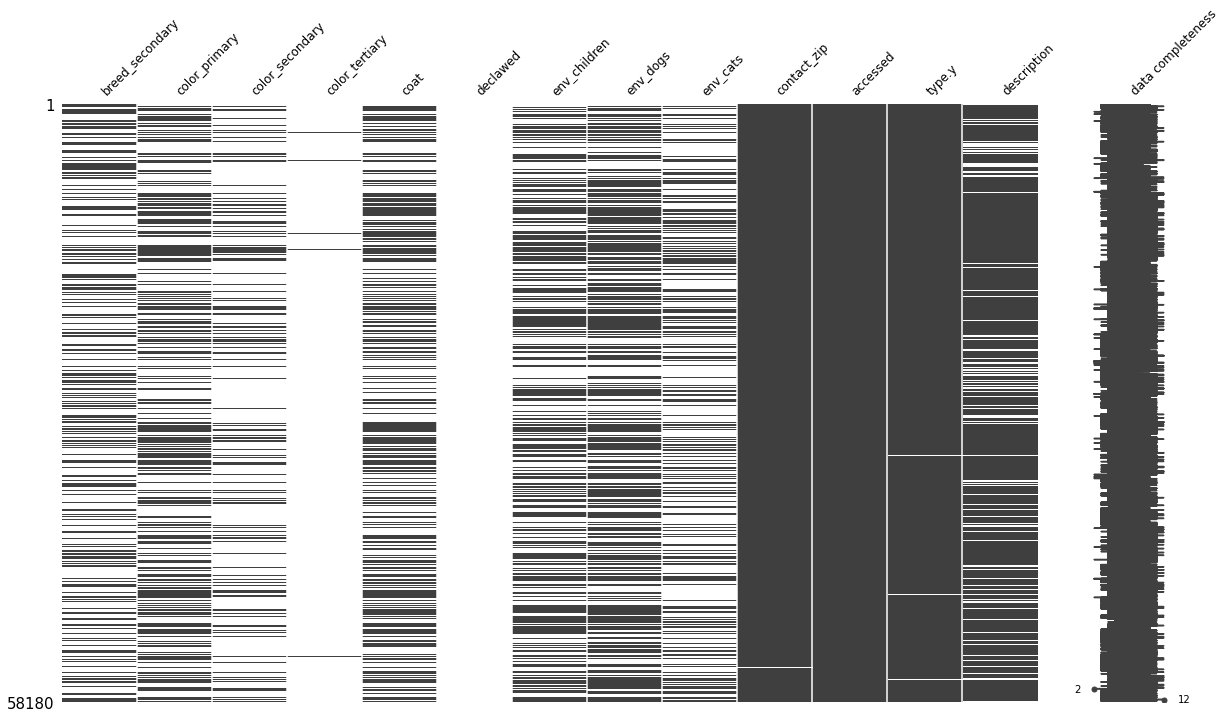

In [33]:
# It's common to having missing data within a dataset, but even that can be part of the story
# To see the missing values Missingno can be used
# First up is Matrix, let's display columns with missing values and ignore columns without an Nans
# The more empty the column is the least about of data available
# The gray line represents existing values and white line represents missing vaules
# visualizing NaNs with msno matrix
missingValueColumns = df.columns[df.isnull().any()].tolist()
msno.matrix(df[missingValueColumns], width_ratios=(10, 1), \
           figsize=(20,11), fontsize=12, sparkline=True, labels=True)

<AxesSubplot:>

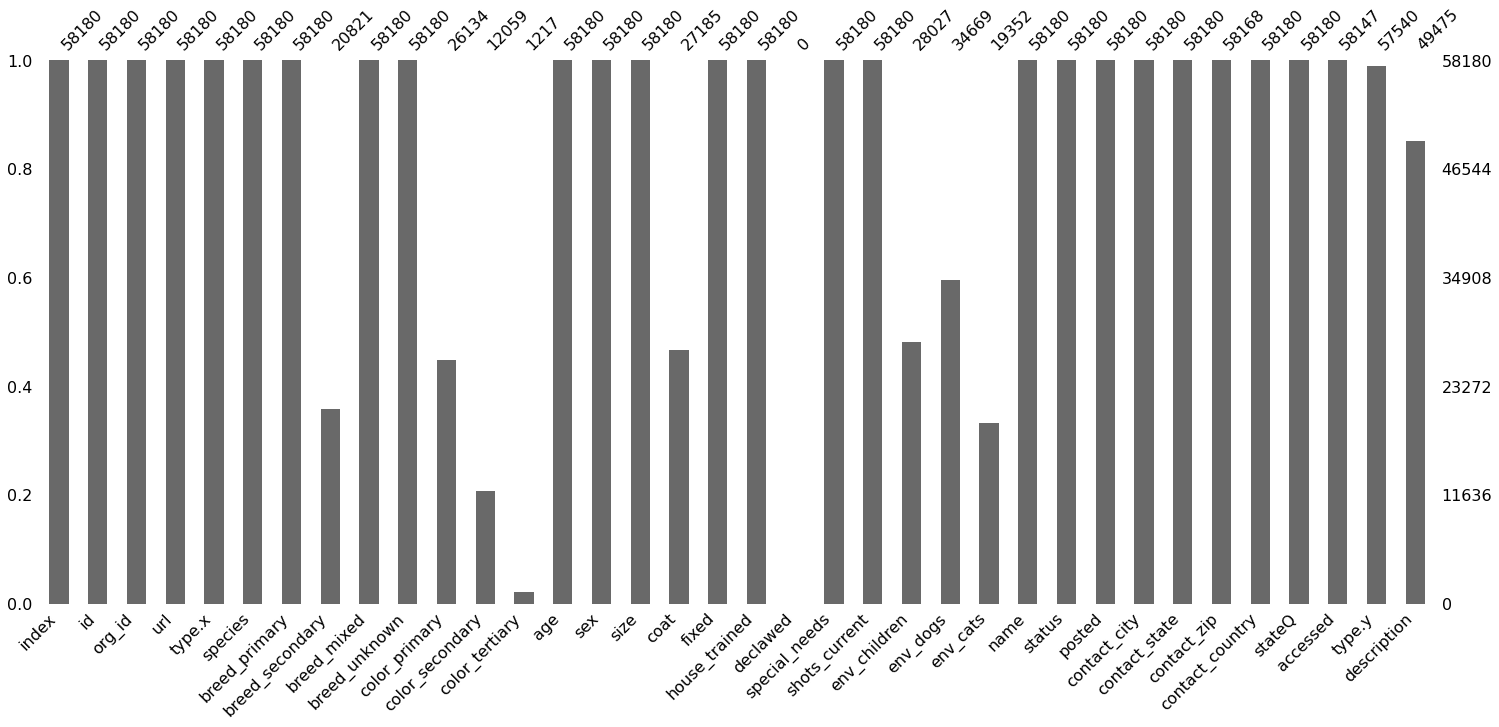

In [34]:
# Next up is bar chart
# a bar chart can find patterns of "missingness"
# The entire dataframe was input instead of selecting columns with missing values like the above Missingno example provides
# After reviewing the data you can then choose which columns to display
# Visualizing NaNs with msno bar chart
msno.bar(df)

<AxesSubplot:>

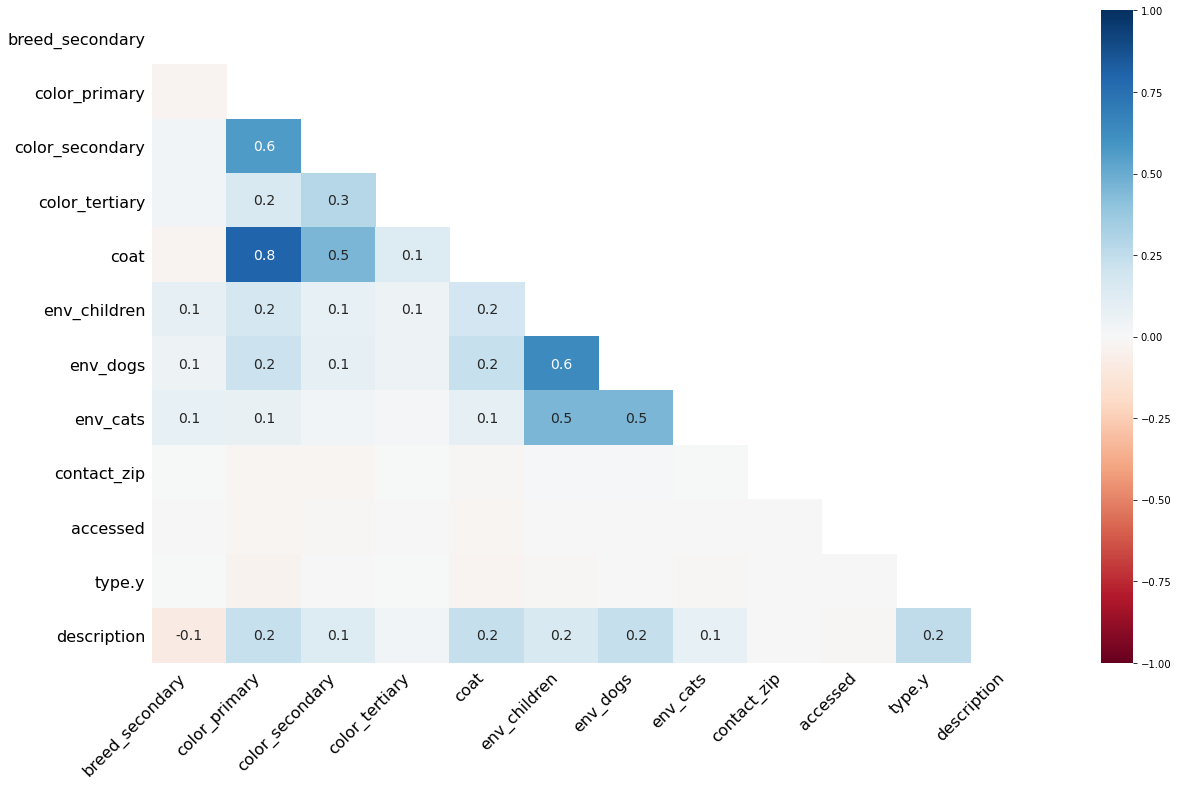

In [35]:
# In this exammple we will utilize heatmap to view the grouped data
# When the value is close to -1, it means the one variable appears then the other variable is very likely to be missing
# When the value is close to 0, it means there is no dependence between the occurrence of missing values of the two variables
# When the value is close to 1, is means one variable appears then the other variable is very likely to be present
# Visualizing NaNs with msno heatmap
msno.heatmap(df)

Text(0, 0.5, 'Count')

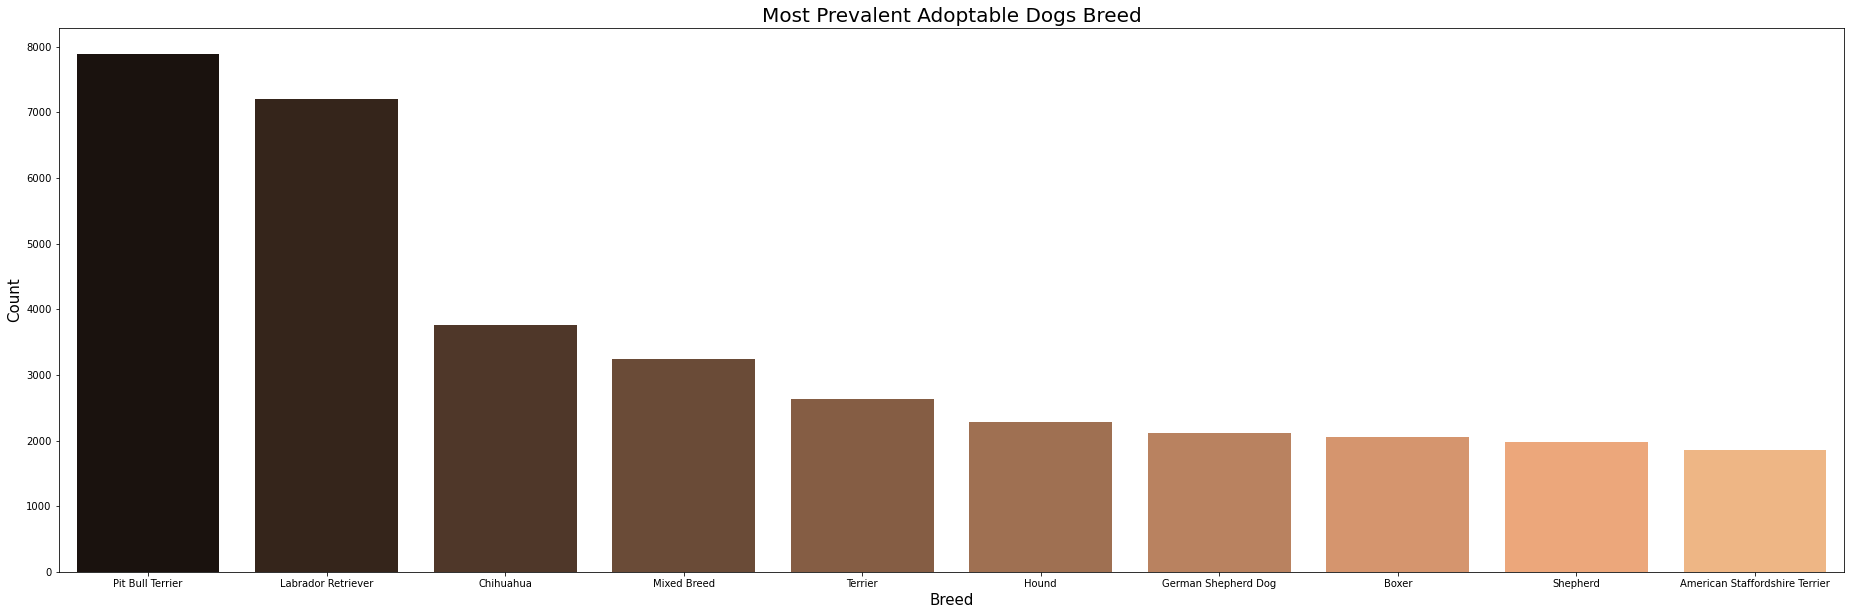

In [45]:
# Seaborn.barplot provides a simple bar chart. Its simple and powerful
# Importing the libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Creating a dataframe for the top 10 breeds with the most count
count = pd.DataFrame(df.breed_primary.value_counts().head(10).reset_index())

# Visualizing the top 10 most prevalent adoptable dog breeds
plt.figure(figsize=(32,10))
sns.barplot(data=count, x='index', y='breed_primary', palette='copper')
plt.title('Most Prevalent Adoptable Dogs Breed', fontsize = 20)
plt.xlabel('Breed', fontsize=15)
plt.ylabel('Count', fontsize=15)

Text(0, 0.5, 'Count')

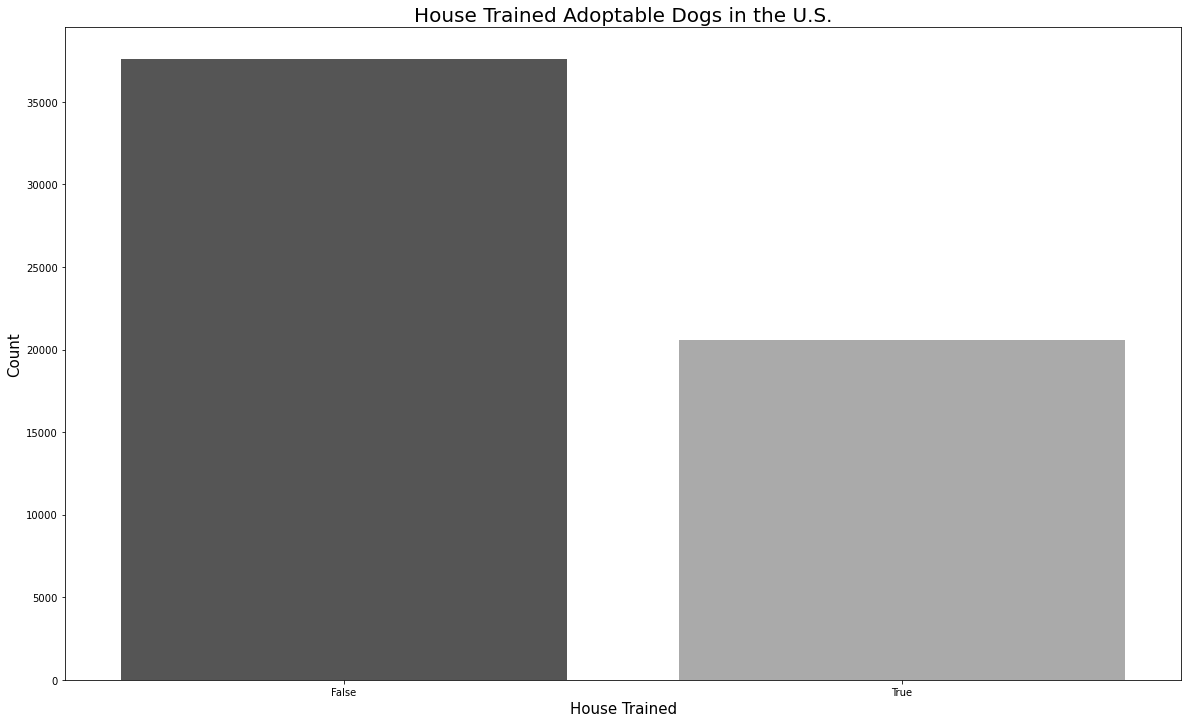

In [39]:
# Expanding seaborn and utlizing seaborn.countplot it quantitive differences across categorical variables
# For this dataset will will provide available dogs that are house trained
# Import the libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Visualizing how many adoptable dogs are house trained vs. not
plt.figure(figsize = (20,12))
sns.countplot(data=df, x='house_trained', palette = 'binary_r')
plt.title('House Trained Adoptable Dogs in the U.S.', fontsize = 20)
plt.xlabel('House Trained', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

<AxesSubplot:title={'center':'Amount of Adopatble Dogs Over Time'}>

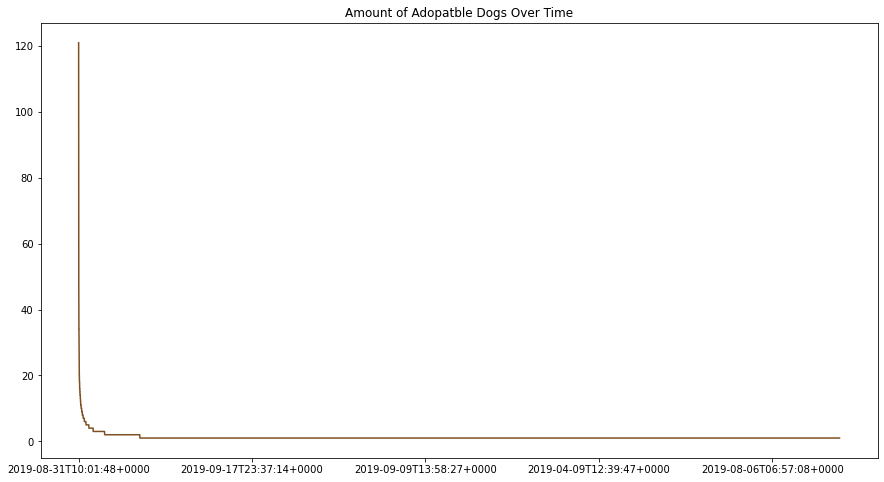

In [41]:
# matplotlib provides the ability to generate a line plot
#
# Importing the libraries
import pandas as pd
import matplotlib.pyplot as plt

# Create new df with date as index
date = df.set_index('posted')
date = date.sort_index()

# Generate line plot - amount of adopatble dogs over time
date[date.index>'2018-01-01'].index.value_counts().plot(
    figsize=(15,8),linewidth=1.5,
    color='#7f4f21', title = 'Amount of Adopatble Dogs Over Time')


In [51]:
# Plotly utilized with interactivity, animation, and can be used with diverse chart types
#
# Bar Chart
# Importing the libraries
import plotly.express as px

# Bar Chart
fig = px.bar(count,
             x='index', y='breed_primary', color = 'index',
             color_discrete_map = {'Pit Bull Terrier': '#3c2f2f', 'Labrador Retriever': '#4b3832',
                                   'Chihuahua': '#b8916e', 'Mixed Breed': '#be9b7b',
                                   'Terrier': '#c4a588', 'Hound': '#d1b9a2',
                                   'German Shepherd': '#e5d7ca', 'Boxer': '#fff4e6'},
             labels = {'index': 'Dog Breed', 'breed_primary': 'Count'},
             title='Most Prevalent Adoptable Dog Breeds in the U.S.')

# Customize Layout
fig.update_xaxes(categoryorder='array', categoryarray= ['Pit Bull Terrier', 'Labrador Retriever',
                'Chihuahua', 'Mixed Breed', 'Terrier', 'Hound', 'German Shepherd', 'Boxer'])
fig.update_layout(paper_bgcolor="#fffffe", plot_bgcolor='#fffffe', font_color='#231717',
                  font_size = 16, legend=dict(
                  orientation="h", y=-0.8, font = dict(size = 10)))


In [43]:
# RoughViz is a visualization package developed by Jared Wilber. It provides sketch-boards and presents a unique view
# Donut Plot
df.breed_mixed.value_counts()

True     41591
False    16589
Name: breed_mixed, dtype: int64

In [44]:
# Importing the libraries
import sys
sys.path.append("..")
from roughviz.charts.donut import Donut

# Creating donut plot
donut = Donut(data={"labels": ['Mixed Breed', 'Non-Mixed Breed'],
                    "values": [41569, 16578]},
              title="Mixed Breed among Adoptable Dogs in the U.S.",
              title_fontsize=2)
donut.show()